<a href="https://colab.research.google.com/github/aujasvit/Transformers/blob/main/Assignment-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1: PotterGPT (Kind of)

More like PotterGPRNNs

Use textual data from the book The Philosopher's Stone to train a generative RNN which can complete sentences for you.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

### Read the data

In [ ]:
!git clone https://github.com/Anweshbyte/whiteboard.git

Cloning into 'whiteboard'...
remote: Enumerating objects: 173, done.
remote: Total 173 (delta 0), reused 0 (delta 0), pack-reused 173
Receiving objects: 100% (173/173), 27.92 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [ ]:
# Load and preprocess the text data
text = open("/content/whiteboard/nbviewer/notebooks/data/harrypotter/Book 1 - The Philosopher's Stone.txt", 'r').read()

##Training and Labels
We would like to split our input data into Training Data and label.
How do we go about it?

Say we have a sentence:- I love the Transformers.

The training data will look like: "I love the"
and the corresponding label will look like: "I love the T"
That is, the model must predict the next letter in the sequence.

The next training sample will be shifted to the right by one.

In [ ]:
sample_text = "The Transformer Nostradamus"
sequence_length = 10
sequences = []
next_chars = []
for i in range(len(sample_text) - sequence_length):
    sequences.append(sample_text[i:i + sequence_length])
    next_chars.append(sample_text[i+sequence_length]) #Predict the next character in the sequence

# for i in range(len(sequences)):
#   print(sequences[i] + next_chars[i])
print(sequences)
print(next_chars)

['The Transf', 'he Transfo', 'e Transfor', ' Transform', 'Transforme', 'ransformer', 'ansformer ', 'nsformer N', 'sformer No', 'former Nos', 'ormer Nost', 'rmer Nostr', 'mer Nostra', 'er Nostrad', 'r Nostrada', ' Nostradam', 'Nostradamu']
['o', 'r', 'm', 'e', 'r', ' ', 'N', 'o', 's', 't', 'r', 'a', 'd', 'a', 'm', 'u', 's']


In [ ]:
# Create input-output pairs

sequence_length = 50
sequences = []
next_chars = []
for i in range(len(text) - sequence_length):
    sequences.append(text[i:i + sequence_length])    # Apply the previous operation on the entire text
    next_chars.append(text[i + sequence_length])   # Apply the previous operation on the entire text

# print(sequences[:5])
# print(next_chars[:5])

In [ ]:
# Vectorize the data
chars = sorted(list(set(text))) # Create a list of unique characters present in the text data
char_indices = {char: index for index, char in enumerate(chars)}
num_chars = len(chars)

x = np.zeros((len(sequences), sequence_length, num_chars), dtype=np.bool)
y = np.zeros((len(sequences), num_chars), dtype=np.bool) # Initialize a 2D numpy array with dimensions (len(sequences), num_chars). It will be used to store the target data for the neural network. each element in y is initialized to zero.


for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        x[i, t, char_indices[char]] = 1  # Set the value at the appropriate position in the x array to 1
    y[i, char_indices[next_chars[i]]] = 1

<ipython-input-8-0ece26229c46>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sequences), sequence_length, num_chars), dtype=np.bool)
<ipython-input-8-0ece26229c46>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sequences), num_chars), dtype=np.bool) # Initialize a 2D numpy array with dimensions (len(sequence

In [ ]:
# Build the RNN model
model = Sequential() # define a sequential model
model.add(LSTM(128, input_shape = (sequence_length, num_chars))) # Add LSTM layer with 128 features and proper input shape
model.add(Dense(num_chars, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# Train the model
epochs = 50 # With the small number of training epochs, the model won't learn to form coherent sentences. The easiest thing you can do to improve the results is to train it for longer (try EPOCHS = 30).
batch_size = 64
model.fit(x, y, batch_size = batch_size, epochs = epochs, verbose = 1) # Using model.fit() train the model for a fixed number of epochs (dataset iterations).

Epoch 1/50
7413/7413 [==============================] - 51s 6ms/step - loss: 2.1900
Epoch 2/50
7413/7413 [==============================] - 42s 6ms/step - loss: 1.7494
Epoch 3/50
7413/7413 [==============================] - 41s 6ms/step - loss: 1.5953
Epoch 4/50
7413/7413 [==============================] - 40s 5ms/step - loss: 1.5094
Epoch 5/50
7413/7413 [==============================] - 41s 6ms/step - loss: 1.4513
Epoch 6/50
7413/7413 [==============================] - 42s 6ms/step - loss: 1.4071
Epoch 7/50
7413/7413 [==============================] - 40s 5ms/step - loss: 1.3728
Epoch 8/50
7413/7413 [==============================] - 40s 5ms/step - loss: 1.3444
Epoch 9/50
7413/7413 [==============================] - 42s 6ms/step - loss: 1.3214
Epoch 10/50
7413/7413 [==============================] - 41s 5ms/step - loss: 1.3023
Epoch 11/50
7413/7413 [==============================] - 41s 6ms/step - loss: 1.2852
Epoch 12/50
7413/7413 [==============================] - 40s 5ms/step - lo

In [ ]:
# Generate text
import random
start_index = random.randrange(0, len(text))# Choose random indices between 0(inclusive) and len(text) - sequence_length -1 (exclusive)
seed_sequence = text[start_index:start_index + sequence_length]

We have trained it for only 1 epoch, so the performance of the model is BAD. Try training it for 10 epochs, and then 50 epochs, and you will see a better performance.

In [ ]:
generated_text = "The letter from Dumbledore said that " #You can play with this!
for _ in range(200):
    x_pred = np.zeros((1, sequence_length, num_chars))
    for t, char in enumerate(seed_sequence):
        x_pred[0, t, char_indices[char]] = 1
    predicted_probs = model.predict(x_pred, verbose=0)[0]
    next_char_index = np.random.choice(range(num_chars), p=predicted_probs)
    next_char = chars[next_char_index] # Retrieve the character corresponding to the sampled index from the `chars` list and store it in the `next_char` variable.
    generated_text = generated_text + next_char # Append the `next_char` to the `generated_text`
    seed_sequence = seed_sequence[1:] + next_char #  Update the `seed_sequence` by removing the first character and adding the `next_char` at the end. This step prepares the updated `seed_sequence` for the next iteration.

print(generated_text)

The letter from Dumbledore said that t 
a howling the lange-book red and decped said of its 
spoppin’ brave violet, then. 
Fingred Ron we’d too leave was older that ovorcry on 
the lot worth students watched spross into ent his 
voice. 



##Question 2: StockPredict101x

Build a RNN/LSTM/GRU model which can predict stock prices.

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Define the ticker symbol and time period
ticker = 'TATAMOTORS.NS'
start_date = '2010-01-01'
end_date = '2022-12-31'

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Select the 'Close' price column
df = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences of historical data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

batch_size = 64
epochs = 100
seq_length = 30  # Number of previous days to consider
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape = (seq_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/100
40/40 [==============================] - 3s 19ms/step - loss: 0.0231
Epoch 2/100
40/40 [==============================] - 1s 20ms/step - loss: 7.8596e-04
Epoch 3/100
40/40 [==============================] - 1s 20ms/step - loss: 6.1176e-04
Epoch 4/100
40/40 [==============================] - 1s 20ms/step - loss: 5.5732e-04
Epoch 5/100
40/40 [==============================] - 1s 19ms/step - loss: 5.3897e-04
Epoch 6/100
40/40 [==============================] - 2s 39ms/step - loss: 5.0260e-04
Epoch 7/100
40/40 [==============================] - 2s 53ms/step - loss: 4.5870e-04
Epoch 8/100
40/40 [==============================] - 2s 44ms/step - loss: 4.9042e-04
Epoch 9/100
40/40 [==============================] - 2s 50ms/step - loss: 4.3030e-04
Epoch 10/100
40/40 [==============================] - 2s 41ms/step - loss: 4.6243e-04
Epoch 11/100
40/40 [==============================] - 2s 38ms/step - loss: 4.2288e-04
Epoch 12/100
40/40 [==============================] - 1s 36ms/step 

In [ ]:
rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
y_actual = scaler.inverse_transform(y_test)

20/20 [==============================] - 0s 4ms/step


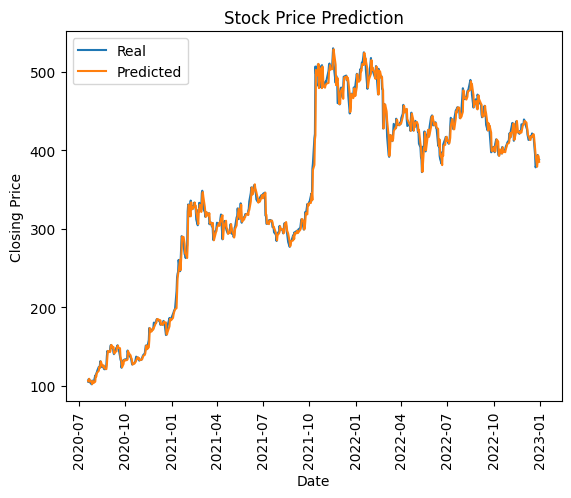

In [ ]:
# data.reset_index(inplace = True)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(data.loc[train_size + seq_length:, 'Date'], y_actual, label = 'Real')
plt.plot(data.loc[train_size + seq_length:, 'Date'], rnn_predictions, label = 'Predicted')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()